In [ ]:
#default_exp preprocessing

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#export
from zipfile import ZipFile
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.utils import *

# Preprocessing

Contains all the steps necessary to preprocess the Kaggle house prices data.

## Downloading & extracting zip files

In [ ]:
dir_raw_data = Path("../data/raw")
competition = "house-prices-advanced-regression-techniques"
compressed_data_file = dir_raw_data/f"{competition}.zip"

In [ ]:
# !kaggle competitions download -c {competition} -p {dir_raw_data}

In [ ]:
# extract_zip_files(compressed_data_file)

In [ ]:
train_path = dir_raw_data/"train.csv"
test_path = dir_raw_data/"test.csv"
train_path, test_path

(PosixPath('../data/raw/train.csv'), PosixPath('../data/raw/test.csv'))

## Loading into data frames and visualizing

In [ ]:
df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [ ]:
display_all(df.head().T)

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [ ]:
display_all(df_test.head().T)

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80,81,74,78,43
LotArea,11622,14267,13830,9978,5005
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,HLS
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [ ]:
dep_var = "SalePrice"

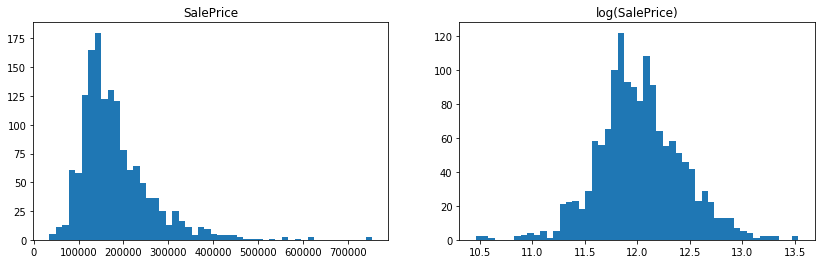

In [ ]:
bins = 50

fig, axs = plt.subplots(ncols=2, figsize=(14,4))
ax = axs[0]
ax.hist(df[dep_var].values, bins=bins)
ax.set_title(f"{dep_var}")
ax = axs[1]
ax.hist(np.log(df[dep_var].values), bins=bins)
ax.set_title(f"log({dep_var})")
plt.show()

In [ ]:
df[dep_var] = df[dep_var].apply(np.log)

## Sampling 

In [ ]:
small_sample = True
n = 100

In [ ]:
#export
def do_sample(df:pd.DataFrame, small_sample:bool, n:int=100) -> pd.DataFrame:
    if small_sample:
        _df = df.sample(n=n)
    else:
        _df = df.copy(deep=True)
    return _df

In [ ]:
df_s = do_sample(df, small_sample=small_sample, n=n)
len(df_s), len(df)

(100, 1460)

## Splitting into train and validation set

In [ ]:
#export
def get_split(df:pd.DataFrame, valid_pct:float=.2) -> pd.DataFrame:
    "Splitting the data frame into train and validation set, creating a new `valid` column"
    valid_idx = np.arange(int((1-valid_pct)*len(df)), len(df))
    train_idx = np.setdiff1d(np.arange(len(df)), valid_idx)
    df["valid"] = False
    df.iloc[valid_idx, df.columns.get_loc("valid")] = True
    return df

In [ ]:
df_s = get_split(df_s, valid_pct=.2)

In [ ]:
df_s["valid"].value_counts()

False    80
True     20
Name: valid, dtype: int64

## Exporting to csv

This can be useful as an intermediate step if you want to look at the data using another visualization tool. Using a visualization tool can be useful to inspect any unwanted artfiacts or skewness of the cleaned data.

In [ ]:
clean_data_path = dir_raw_data.parent/"train_clean.csv"
clean_test_data_path = dir_raw_data.parent/"test_clean.csv"

clean_data_path, clean_test_data_path

(PosixPath('../data/train_clean.csv'), PosixPath('../data/test_clean.csv'))

In [ ]:
df_s.to_csv(clean_data_path, index=False, encoding="utf8")
df_test.to_csv(clean_test_data_path, index=False, encoding="utf8")

In [ ]:
#hide
from nbdev.showdoc import *